#### pandas - DataFrames

Agenda<br>
Introduction to DataFrames - one of the two important data structures in pandas<br>
Working with DataFrames<br>
Importing financial data from sources such as Yahoo Finance<hr>

DataFrame is a very useful data structure in pandas.  <br>
It resembles a spreadsheet full of data with columns describing attributes of the data.  <br>
The first row will contain the column headings; We can optionally explicitly specify an index for each row (see example below), pandas can internally index each row starting from 0.<hr>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
tim_gr=[65,80,80]
nanda_gr=[80,80,90]
juan_gr=[90,95,95]

In [3]:
df=DataFrame([tim_gr, nanda_gr, juan_gr], index=['Tim','Nanda','Juan'], columns=['CIS','ACC','MKT'])
print(df)

       CIS  ACC  MKT
Tim     65   80   80
Nanda   80   80   90
Juan    90   95   95


In [4]:
gr_book=np.array([tim_gr, nanda_gr, juan_gr])

In [5]:
df1=DataFrame(gr_book, index=['Tim','Nanda','Juan'],columns=['CIS','ACC','MKT'])
print(df1)

       CIS  ACC  MKT
Tim     65   80   80
Nanda   80   80   90
Juan    90   95   95


In [6]:
# Examining column names

df.columns

Index(['CIS', 'ACC', 'MKT'], dtype='object')

In [7]:
# accessing values in columns

df['CIS']

Tim      65
Nanda    80
Juan     90
Name: CIS, dtype: int64

In [8]:
# accessing rows

#df.head()
#df.tail()
df.head(2)

,CIS,ACC,MKT
Tim,65,80,80
Nanda,80,80,90


In [9]:
# accessing rows by index

df.loc['Tim']

CIS    65
ACC    80
MKT    80
Name: Tim, dtype: int64

In [10]:
df.iloc[:2]

,CIS,ACC,MKT
Tim,65,80,80
Nanda,80,80,90


In [11]:
df.ix[:2,['CIS', 'MKT']]

C:\Users\kanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,CIS,MKT
Tim,65,80
Nanda,80,90


In [12]:
df.sum()

CIS    235
ACC    255
MKT    265
dtype: int64

In [13]:
df.describe()

,CIS,ACC,MKT
count,3.000000,3.000000,3.000000
mean,78.333333,85.000000,88.333333
std,12.583057,8.660254,7.637626
min,65.000000,80.000000,80.000000
25%,72.500000,80.000000,85.000000
50%,80.000000,80.000000,90.000000
75%,85.000000,87.500000,92.500000
max,90.000000,95.000000,95.000000


In [1]:
import pandas as pd
from pandas import Series,DataFrame
import datetime              
from pandas_datareader import data as wb

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
ticker=['AAPL', 'MSFT', 'AMZN', 'GOOG']

In [16]:
f=wb.DataReader('AAPL', 'yahoo', start, end)

In [17]:
#Return the first n rows, default n is 5
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,27.146566,111902700


In [15]:
prices=wb.get_data_yahoo(['AAPL', 'MSFT', 'AMZN', 'GOOG'], start, end)['Adj Close']

In [16]:
prices.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-01-25,56.832123,283.989990,374.399902,24.411926
2013-01-24,58.204231,273.459991,374.668152,24.193018
2013-01-23,66.409676,268.109985,368.354218,24.175510
2013-01-22,65.215858,270.190002,349.164032,23.772732
2013-01-18,64.599586,272.119995,349.978729,23.860291


In [5]:
volume=wb.get_data_yahoo(['AAPL', 'MSFT', 'AMZN', 'GOOG'], start, end)['Volume']

In [6]:
volume.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-01-25,302006600.0,4968100.0,4480700.0,81847700.0
2013-01-24,365213100.0,3417000.0,6809200.0,101739300.0
2013-01-23,215377400.0,2508900.0,11895000.0,50387700.0
2013-01-22,115386600.0,2137700.0,7634000.0,58650600.0
2013-01-18,118230700.0,2942000.0,6495500.0,52167700.0


In [17]:
prices.loc['2010-01-04']


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,27.406532,133.899994,311.349976,25.148876


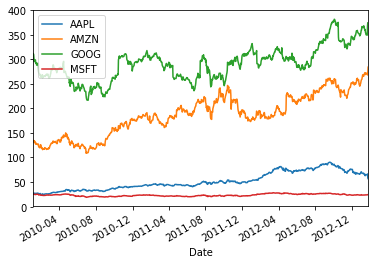

In [23]:
%matplotlib inline
prices.plot()

In [24]:
s = datetime.datetime(2010, 1, 4)
e = datetime.datetime(2010, 1, 10)

f[s:e]['Open']

Date
2010-01-04    30.490000
2010-01-05    30.657143
2010-01-06    30.625713
2010-01-07    30.250000
2010-01-08    30.042856
Name: Open, dtype: float64